In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


/Users/kate/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


We are using a housing price dataset sourced from Bay Area Home Sales Database and Zillow. This dataset was based on the homes sold between January 2013 and December 2015. 

In [2]:
inputs = [pd.read_csv('./agent1/bay_area_zillow_agent1.csv'), pd.read_csv('./agent2/bay_area_zillow_agent2.csv')]
df = pd.concat(f for f in inputs)

In [3]:
# randomise my dataframe rows to remove any ordering in the data
# TODO fix seed to preserve reproducibility
df = df.sample(frac=1).reset_index(drop=True)


In [4]:
df.describe(include = "all")

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
count,11330.000000,11330,11330,11330,11330.000000,11330.000000,11330.000000,11330,1.133000e+04,11330.000000,11330.000000,11330,11330.000000,11330,11330.000000,1.133000e+04,1.133000e+04,11330.000000,1.133000e+04
unique,NaN,10730,11232,10684,NaN,NaN,NaN,954,NaN,NaN,NaN,71,NaN,10,NaN,NaN,NaN,NaN,NaN
top,NaN,Address: 1300 Eddy Street,San FranciscoSales price: 725000Sales date: 02...,1300 Eddy St,NaN,NaN,NaN,08/30/2013,NaN,NaN,NaN,Mission,NaN,SingleFamily,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,3,5,NaN,NaN,NaN,46,NaN,NaN,NaN,540,NaN,5803,NaN,NaN,NaN,NaN,NaN
mean,9171.729214,NaN,NaN,NaN,1.980229,2.614475,1585.420918,NaN,1.263928e+06,37.759711,-122.436518,NaN,6.111562,NaN,1948.498147,1.565695e+06,1.320205e+06,94116.912004,3.689973e+07
std,4921.941074,NaN,NaN,NaN,1.047358,1.299457,921.978245,NaN,1.042079e+06,0.025578,0.030743,NaN,12.125819,NaN,37.911196,1.229417e+06,5.848170e+05,9.400877,7.800741e+07
min,2.000000,NaN,NaN,NaN,0.500000,0.000000,1.000000,NaN,5.350000e+02,37.708170,-122.510726,NaN,1.000000,NaN,1860.000000,4.323850e+05,6.881000e+05,94102.000000,1.506329e+07
25%,5039.750000,NaN,NaN,NaN,1.000000,2.000000,1019.000000,NaN,7.292500e+05,37.739286,-122.455157,NaN,4.000000,NaN,1916.000000,9.052375e+05,9.829000e+05,94110.000000,1.510847e+07
50%,9198.500000,NaN,NaN,NaN,2.000000,2.000000,1362.000000,NaN,9.900000e+05,37.760513,-122.432510,NaN,5.000000,NaN,1940.000000,1.230758e+06,1.211900e+06,94115.000000,1.515697e+07
75%,13374.750000,NaN,NaN,NaN,2.000000,3.000000,1876.000000,NaN,1.450000e+06,37.781386,-122.413359,NaN,7.000000,NaN,1986.000000,1.731170e+06,1.480400e+06,94123.000000,5.970040e+07


In [5]:
df.columns

Index(['Unnamed: 0', 'address', 'info', 'z_address', 'bathrooms', 'bedrooms',
       'finishedsqft', 'lastsolddate', 'lastsoldprice', 'latitude',
       'longitude', 'neighborhood', 'totalrooms', 'usecode', 'yearbuilt',
       'zestimate', 'zindexvalue', 'zipcode', 'zpid'],
      dtype='object')

In [6]:
# drop unneeded columns
df.drop(df.columns[[0, 1, 2, 3, 11, 13, 14, 15, 16, 17, 18]], axis=1, inplace=True)

In [7]:
df.describe(include = "all")

,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,totalrooms
count,11330.000000,11330.000000,11330.000000,11330,1.133000e+04,11330.000000,11330.000000,11330.000000
unique,NaN,NaN,NaN,954,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,08/30/2013,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,46,NaN,NaN,NaN,NaN
mean,1.980229,2.614475,1585.420918,NaN,1.263928e+06,37.759711,-122.436518,6.111562
std,1.047358,1.299457,921.978245,NaN,1.042079e+06,0.025578,0.030743,12.125819
min,0.500000,0.000000,1.000000,NaN,5.350000e+02,37.708170,-122.510726,1.000000
25%,1.000000,2.000000,1019.000000,NaN,7.292500e+05,37.739286,-122.455157,4.000000
50%,2.000000,2.000000,1362.000000,NaN,9.900000e+05,37.760513,-122.432510,5.000000
75%,2.000000,3.000000,1876.000000,NaN,1.450000e+06,37.781386,-122.413359,7.000000


In [8]:
# check none of our data is null or NaN
df.isnull().any()

bathrooms        False
bedrooms         False
finishedsqft     False
lastsolddate     False
lastsoldprice    False
latitude         False
longitude        False
totalrooms       False
dtype: bool

In [9]:
df.dtypes


bathrooms        float64
bedrooms           int64
finishedsqft       int64
lastsolddate      object
lastsoldprice      int64
latitude         float64
longitude        float64
totalrooms         int64
dtype: object

In [10]:
df['bathrooms'] = df['bathrooms'].astype('int64', copy=False)
df['lastsolddate'] = pd.to_datetime(df['lastsolddate'])


In [11]:
df.dtypes

bathrooms                 int64
bedrooms                  int64
finishedsqft              int64
lastsolddate     datetime64[ns]
lastsoldprice             int64
latitude                float64
longitude               float64
totalrooms                int64
dtype: object

We hypothesise that `finishedsqft`, `bathrooms` and `bedrooms` are positively correlated with `lastsoldprice`. Let's plot these to see.

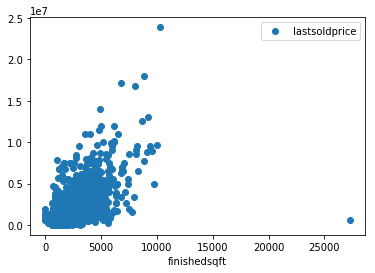

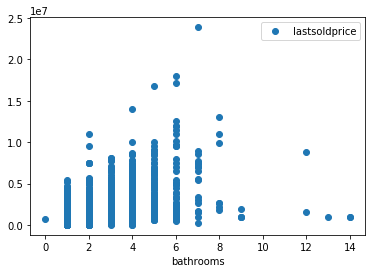

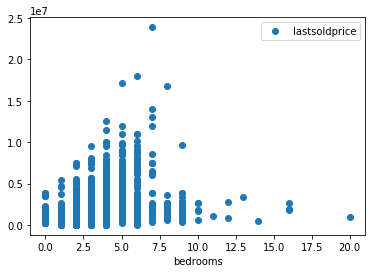

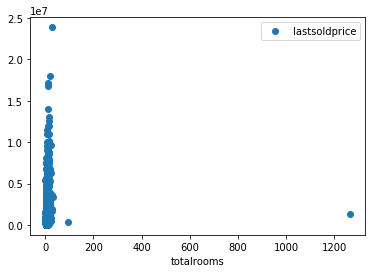

In [12]:
df.plot(x='finishedsqft', y='lastsoldprice', style='o')
df.plot(x='bathrooms', y='lastsoldprice', style='o')
df.plot(x='bedrooms', y='lastsoldprice', style='o')
df.plot(x='totalrooms', y='lastsoldprice', style='o')

Now let's try a random forest model on those features to predict `lastsoldprice`

In [13]:
X = df[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'longitude', 'latitude']]
Y = df['lastsoldprice']

These are our features:

In [14]:
X.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,longitude,latitude
0,2,3,1107,6,-122.505535,37.735935
1,1,3,1750,5,-122.505268,37.761630
2,2,3,1452,8,-122.381454,37.728354
3,2,3,1422,7,-122.465595,37.779585
4,2,3,2154,9,-122.404821,37.723132


In [28]:
# Split data into test and training set. Use random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 12, 14], 'max_features': [1,2, 3, 4, 5, 6]},
    {'bootstrap': [False]}
]

rand_forest_regressor = RandomForestRegressor()

# grid_search = GridSearchCV(rand_forest_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# grid_search.fit(X_train, y_train)

In [29]:
rand_forest_regressor.get_params().keys()

dict_keys(['bootstrap', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [30]:
grid_search = GridSearchCV(rand_forest_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')


In [31]:
#rand_forest_regressor.fit(X_train, y_train)

In [32]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 12, 14], 'max_features': [1, 2, 3, 4, 5, 6]}, {'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [33]:
grid_search.best_params_

{'max_features': 1, 'n_estimators': 14}

In [34]:
y_pred = grid_search.predict(X_test)

In [35]:
#rand_forest_regressor.score(X_test, y_test)

In [36]:
grid_search.score(X_test, y_test)

-285759695700.31354

In [37]:
print('Linear Regression coefficient of determination (R squared): %.4f' % (0 - grid_search.score(X_test, y_test))) # since score is negative

Linear Regression coefficient of determination (R squared): 285759695700.3135


In [25]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 515079.9922
